In [3]:
%pip install "tensorflow[and-cuda]"
%pip install nvidia-pyindex
%pip install --upgrade nvidia-tensorrt
%pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/ef/1d/bf1d78126c3d106100232d3a18b7f3732e7dc3b71ee38ab735e4064b19cc/matplotlib-3.8.

In [2]:
import tensorflow as tf

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras import Input, layers, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
IMG_DIM = (256, 256, 3)

In [7]:
meso4 = Sequential([
    Input(shape=IMG_DIM),

    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), padding='same'),

    layers.Conv2D(8, (5, 5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), padding='same'),

    layers.Conv2D(16, (5, 5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), padding='same'),

    layers.Conv2D(16, (5, 5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(4, 4), padding='same'),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(16),

    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

2024-03-14 21:14:16.384247: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-14 21:14:16.385413: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-14 21:14:16.385745: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [8]:
meso4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 8)    │         1,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 16)     │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 16)     │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        16,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,073 (109.66 KB)

 Trainable params: 27,977 (109.29 KB)

 Non-trainable params: 96 (384.00 B)

In [9]:
meso4.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [10]:
img_data_gen = ImageDataGenerator()

In [11]:
generator = img_data_gen.flow_from_directory('./Dataset/Train/', target_size=(256, 256), class_mode='binary', shuffle=True)

Found 140002 images belonging to 2 classes.


In [12]:
generator.class_indices

{'Fake': 0, 'Real': 1}

In [13]:
val_gen = img_data_gen.flow_from_directory('./Dataset/Validation/', target_size=(256, 256), class_mode='binary', shuffle=True)
val_gen.class_indices

Found 39428 images belonging to 2 classes.


{'Fake': 0, 'Real': 1}

In [14]:
history = meso4.fit(generator, epochs=10, validation_data=val_gen)

Epoch 1/10


/home/k1sh0r/Projects/DeepFakeDetection/.dfd/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1710431080.110518  134158 service.cc:145] XLA service 0x7809300081a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1710431080.110553  134158 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1050 Ti, Compute Capability 6.1
2024-03-14 21:14:40.399809: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-14 21:14:41.227927: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN ve

   3/4376 ━━━━━━━━━━━━━━━━━━━━ 4:41 64ms/step - accuracy: 0.6128 - loss: 2.1093  

I0000 00:00:1710431091.032239  134158 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4376/4376 ━━━━━━━━━━━━━━━━━━━━ 385s 85ms/step - accuracy: 0.7105 - loss: 0.7193 - val_accuracy: 0.8692 - val_loss: 0.3008
Epoch 2/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 811s 185ms/step - accuracy: 0.9149 - loss: 0.2139 - val_accuracy: 0.9081 - val_loss: 0.2278
Epoch 3/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 755s 172ms/step - accuracy: 0.9369 - loss: 0.1626 - val_accuracy: 0.9176 - val_loss: 0.2009
Epoch 4/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 573s 131ms/step - accuracy: 0.9445 - loss: 0.1419 - val_accuracy: 0.9255 - val_loss: 0.1788
Epoch 5/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 656s 150ms/step - accuracy: 0.9507 - loss: 0.1298 - val_accuracy: 0.9321 - val_loss: 0.1651
Epoch 6/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 458s 104ms/step - accuracy: 0.9525 - loss: 0.1227 - val_accuracy: 0.9220 - val_loss: 0.1859
Epoch 7/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 273s 62ms/step - accuracy: 0.9544 - loss: 0.1172 - val_accuracy: 0.9404 - val_loss: 0.1507
Epoch 8/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 269s 62ms/step - accuracy: 0.9570

In [15]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


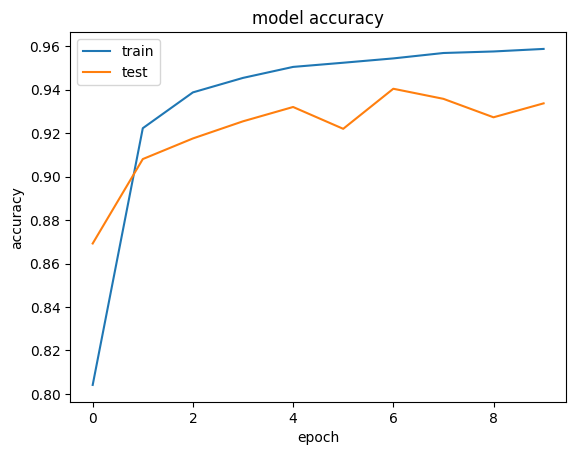

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

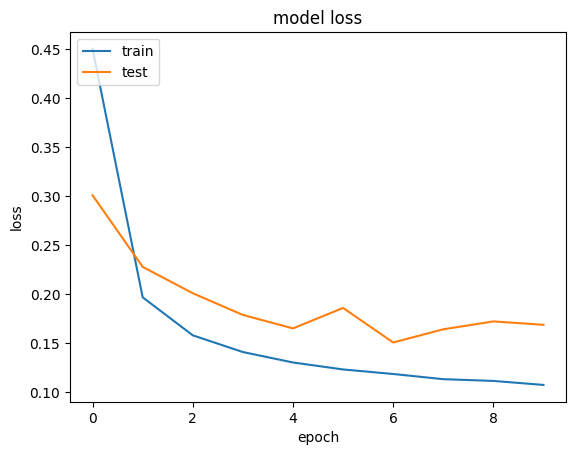

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
%pip install pyyaml h5py  # Required to save models in HDF5 format

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
meso4.save_weights('MESO4.weights.h5')

In [19]:
meso4.save('Meso4.h5')

In [20]:
meso4.save('Meso4.keras')

In [21]:
test_generator = img_data_gen.flow_from_directory('./Dataset/Test/', target_size=(256, 256), batch_size=32, class_mode='binary')

Found 10905 images belonging to 2 classes.


In [22]:
meso4.evaluate(test_generator)

341/341 ━━━━━━━━━━━━━━━━━━━━ 91s 266ms/step - accuracy: 0.8663 - loss: 0.3432


[0.34894058108329773, 0.8677670955657959]

In [23]:
meso4_json = meso4.to_json()

In [24]:
with open('MESO4.json', 'w') as json_file:
    json_file.write(meso4_json)

In [29]:
new_model = tf.keras.models.load_model('Meso4.keras')


/home/k1sh0r/Projects/DeepFakeDetection/.dfd/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 22 variables whereas the saved optimizer has 42 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [30]:
new_model.evaluate(test_generator)

341/341 ━━━━━━━━━━━━━━━━━━━━ 120s 350ms/step - accuracy: 0.8649 - loss: 0.3573


[0.3492385447025299, 0.8677670955657959]